# Stanton Murillo Transport Validation and Improved XC Correction

[1] "Ionic transport in high-energy-density matter"  [10.1103/PhysRevE.93.043203](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.93.043203)

[2]"Efficient model for electronic transport in high energy-density matter "  [https://doi.org/10.1063/5.0048162](https://doi.org/10.1063/5.0048162)

[3]"Rapid ..." [https:...]

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv

import SMT.core.transport as SMT
from SMT.core.physical_constants import *
from SMT.core.physical_parameters import rs_from_n

import matplotlib.pyplot as plt
import matplotlib as mpl

from cycler import cycler


mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#636363'
mpl.rcParams['grid.alpha'] = 0.12
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['axes.prop_cycle'] = cycler('color',  ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.figsize'] = 8, 4.9443
mpl.rcParams['figure.dpi'] = 100

In [44]:
N_ions = 1
Z, A = 13, 26.98
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])
T_array_AU = np.array([1*eV_to_AU, 1*eV_to_AU ])
# ρi_gpercc  = 1
ni_array_cc = np.array([6.02660153e+22])#np.array([ρi_gpercc])/(mi_array_AU*AU_to_g)
ni_array_AU = ni_array_cc*invcc_to_AU
smt = SMT.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )

print(f"For Z={Z}, A={A}, T={T_array_AU[0]*AU_to_eV:0.3e} [eV], n = {ni_array_cc[0]:0.3e} [1/cc]: ")
print(f"Zbar={smt.Zbar_array[0]:0.3e}, λeff = {smt.λeff*AU_to_cm:0.3e} [cm]")

print(f"[[gee, gei],[gie,gii]] = {smt.g_matrix} ")
print(f"K_11(gij) = {smt.K_11_matrix}")
print(f"K_12(gij) = {smt.K_12_matrix}")
print(f"K_22(gij) = {smt.K_22_matrix}")
print(f"K_13(gij) = {smt.K_13_matrix}")
print(f"Dij = {smt.Dij*AU_to_cm**2/AU_to_s} [cm^2/s]")
print(f"σ = {smt.σ * AU_to_Siemens/AU_to_cm:0.3e} [S/cm]")
print(f"κ = {smt.κi[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K):0.3e} [erg/cm/s/K]")


For Z=13, A=26.98, T=1.000e+00 [eV], n = 6.027e+22 [1/cc]: 
Zbar=2.496e+00, λeff = 3.879e-09 [cm]
[[gee, gei],[gie,gii]] = [[ 37.12090087  92.6594194 ]
 [ 92.6594194  231.29201616]] 
K_11(gij) = [[0.00196527 0.00051413]
 [0.00051413 0.00012414]]
K_12(gij) = [[0.00465547 0.00127532]
 [0.00127532 0.00031788]]
K_22(gij) = [[0.00515646 0.00132724]
 [0.00132724 0.0003153 ]]
K_13(gij) = [[0.01554118 0.00441796]
 [0.00441796 0.0011279 ]]
Dij = [[0.5167119  0.22415317]
 [0.22415317 0.0009501 ]] [cm^2/s]
σ = 1.889e+04 [S/cm]
κ = 1.926e+07 [erg/cm/s/K]


FROM LUKE:

For Z=13, A=26.98, T=1.000e+00 [eV], n = 6.027e+22 [1/cc]: 
Zbar=2.496e+00, λeff = 3.353e-02 [cm]
gii = [185.81354848] 
K_11(gii) = [0.00017552]
K_12(gii) = [0.00044746]
K_22(gii) = [0.00044746]
K_13(gii) = [0.00157653]
Dij = 2.349e-03 [cm^2/s]
κ = 4.792e+04 [erg/cm/s/K]

In [45]:
N_ions = 1
Z, A = 1, 1
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])
T_array_AU = np.array([1*eV_to_AU, 1*eV_to_AU ])
ρi_gpercc  = 1
ni_array_cc = np.array([ρi_gpercc])/(mi_array_AU*AU_to_g)
ni_array_AU = ni_array_cc*invcc_to_AU
smt = SMT.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )


print(f"For Z={Z}, A={A}, T={T_array_AU[0]*AU_to_eV:0.3e} [eV], n = {ni_array_cc[0]:0.3e} [1/cc]: ")
print(f"Zbar={smt.Zbar_array[0]:0.3e}, λeff = {smt.λeff*AU_to_cm:0.3e} [cm]")

print(f"[[gee, gei],[gie,gii]] = {smt.g_matrix} ")
print(f"K_11(gij) = {smt.K_11_matrix}")
print(f"K_12(gij) = {smt.K_12_matrix}")
print(f"K_22(gij) = {smt.K_22_matrix}")
print(f"K_13(gij) = {smt.K_13_matrix}")
print(f"Dij = {smt.Dij*AU_to_cm**2/AU_to_s} [cm^2/s]")
print(f"σ = {smt.σ * AU_to_Siemens/AU_to_cm:0.3e} [S/cm]")
print(f"κ = {smt.κi[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K):0.3e} [erg/cm/s/K]")

For Z=1, A=1, T=1.000e+00 [eV], n = 6.022e+23 [1/cc]: 
Zbar=6.913e-01, λeff = 3.279e-09 [cm]
[[gee, gei],[gie,gii]] = [[43.90858135 30.35394188]
 [30.35394188 20.98363826]] 
K_11(gij) = [[0.00154723 0.00260559]
 [0.00260559 0.00431052]]
K_12(gij) = [[0.0037017  0.00609281]
 [0.00609281 0.00980767]]
K_22(gij) = [[0.00404846 0.0068573 ]
 [0.0068573  0.01139656]]
K_13(gij) = [[0.01245545 0.02013608]
 [0.02013608 0.03179427]]
Dij = [[0.13577132 0.11932431]
 [0.11932431 0.00499792]] [cm^2/s]
σ = 1.346e+04 [S/cm]
κ = 1.870e+07 [erg/cm/s/K]


In [46]:

T_AU_list = np.geomspace(1e-1,1e4,num=100)*eV_to_AU
# T_AU_list = np.array(σ_data_e1b['T[eV]'])*eV_to_AU
σ_list_cgs = np.ones_like(T_AU_list)
κ_list_cgs = np.ones_like(T_AU_list)
D_list_cgs = np.ones_like(T_AU_list)
for i, T_AU in enumerate(T_AU_list): 
    smt.T_array = np.array([T_AU, T_AU])
    σ_list_cgs[i] = smt.σ * AU_to_Siemens/AU_to_cm
    κ_list_cgs[i] = smt.κi[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)  #erg/cm/s/K
    D_list_cgs[i] = smt.Dij[1,1] *AU_to_cm**2/AU_to_s
    # print(25*smt.K_11_matrix[0,1:] - 20*smt.K_12_matrix[0,1:] + 4*smt.K_13_matrix[0,1:]," = ", 25*smt.K_11_matrix[0,1:], - 20*smt.K_12_matrix[0,1:], 4*smt.K_13_matrix[0,1:])
    print(f"g: {smt.g_matrix}")
    print("denom: ", 25*smt.K_11_matrix - 20*smt.K_12_matrix + 4*smt.K_13_matrix, '\n')#," = \n", 25*smt.K_11_matrix, - 20*smt.K_12_matrix, 4*smt.K_13_matrix)


g: [[440.51726992 304.06554556]
 [304.06554556 209.88020745]]
denom:  [[0.00045314 0.00081855]
 [0.00081855 0.00146245]] 

g: [[392.13815719 270.67475165]
 [270.67475165 186.83420585]]
denom:  [[0.00054614 0.00098329]
 [0.00098329 0.00175012]] 

g: [[349.07032925 240.94987066]
 [240.94987066 166.31846166]]
denom:  [[0.00065758 0.00117984]
 [0.00117984 0.00209168]] 

g: [[310.73068571 214.48845265]
 [214.48845265 148.05520804]]
denom:  [[0.00079095 0.00141403]
 [0.00141403 0.00249656]] 

g: [[276.60014146 190.93223148]
 [190.93223148 131.79717417]]
denom:  [[0.00095037 0.00169263]
 [0.00169263 0.00297567]] 

g: [[246.21659889 169.96227425]
 [169.96227425 117.32423727]]
denom:  [[0.00114065 0.00202355]
 [0.00202355 0.00354159]] 

g: [[219.16869142 151.29466288]
 [151.29466288 104.44044206]]
denom:  [[0.00136744 0.00241595]
 [0.00241595 0.00420883]] 

g: [[195.09021391 134.67664999]
 [134.67664999  92.97134741]]
denom:  [[0.00163734 0.00288048]
 [0.00288048 0.00499406]] 

g: [[173.6551646

## $K_{nm}$

In [47]:
K11_data = read_csv("K_11(g).txt", delim_whitespace=True, header=1)

(array(0.21901579), array(0.12091229))

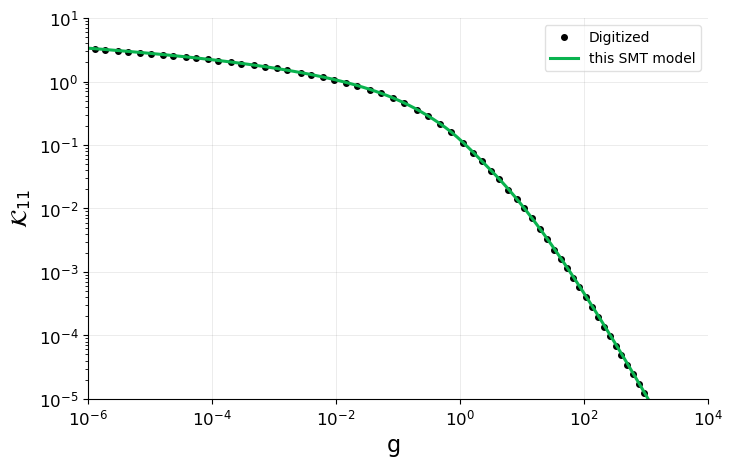

In [48]:
from SMT.core.transport import K_nm

fig, ax = plt.subplots( facecolor='white')

#Plot iSMT digitized
ax.plot(K11_data['g'], K11_data['K_11(g)'],'k.', label="Digitized")
#
g_array = np.geomspace(1e-6,1e4,num=100)
ax.plot(g_array,[K_nm(g,1,1) for g in g_array], label='this SMT model')

ax.set_xlabel(r"g ", fontsize=16)
ax.set_ylabel(r"$\mathcal{K}_{11}$", fontsize=16)

# Inset Text Box
# bbox = dict(boxstyle='round', facecolor='white', alpha=0.5)
# inset_text = f"{Element_name}\n {sci_notation(ni_cc,3)} [cc$^{{-1}}$]" 
# ax.text(0.35, 0.95, inset_text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=smt)

# ax.errorbar([tccw_TeV],[tccw_η_cgs], yerr=[tccw_η_cgs_err], barsabove=True, capsize=5, marker='.', label='MD Simulation')

# Scales
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-5,1e1)
ax.set_xlim(1e-6,1e4)
# Legend
ax.legend()

K_nm(1,1,2), K_nm(1,1,1) 


## Define Useful transport function

In [49]:
def get_transport_functions(Z, A, ni_cc, xc_type=None):

    if xc_type==None:
        smt = SMT.TransportProperties(1, np.array([m_amu*A]), np.array([Z]), np.array([1*eV_to_AU, 1*eV_to_AU ]), np.array([ni_cc])*invcc_to_AU, improved_xc_SMT=False)
    else:
        smt = SMT.TransportProperties(1, np.array([m_amu*A]), np.array([Z]), np.array([1*eV_to_AU, 1*eV_to_AU ]), np.array([ni_cc])*invcc_to_AU, improved_xc_SMT=True, xc_type='PDW')


    # All out in cgs
    @np.vectorize
    def ηSMT(T_eV):
        T_AU = T_eV*eV_to_AU
        smt.T_array = np.array([T_AU, T_AU])
        return smt.viscosity()*AU_to_g*AU_to_invcc*AU_to_cm**2/AU_to_s
    
    @np.vectorize
    def ηGBI(T_eV):
        yvm = YVM(smt.mi_array*AU_to_g, smt.mi_array*AU_to_g*smt.ni_array*AU_to_invcc, T_eV, Z, units_out='cgs')
        return yvm.viscosity_GBI()
    
    @np.vectorize
    def ηYVM(T_eV):
        yvm = YVM(smt.mi_array*AU_to_g, smt.mi_array*AU_to_g*smt.ni_array*AU_to_invcc, T_eV, Z, units_out='cgs')
        return yvm.viscosity_YVM()

    @np.vectorize
    def κiSMT(T_eV):
        T_AU = T_eV*eV_to_AU
        smt.T_array = np.array([T_AU, T_AU])
        return smt.κi* AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)
 
    @np.vectorize
    def κeSMT(T_eV):
        T_AU = T_eV*eV_to_AU
        smt.T_array = np.array([T_AU, T_AU])
        return smt.κee* AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)
    
    @np.vectorize
    def σeSMT(T_eV):
        T_AU = T_eV*eV_to_AU
        smt.T_array = np.array([T_AU, T_AU])
        return smt.σ* AU_to_Siemens/AU_to_cm

    return ηSMT, ηGBI, ηYVM, κiSMT, κeSMT, σeSMT


## Electrical Conductivity

First, loading data from [2]

In [50]:
σ_data_e1b = read_csv("Fig1b_eSMT_σ.txt", delim_whitespace=True, header=1)

In [51]:
T_AU_list = np.geomspace(1e-1,1e4,num=100)*eV_to_AU
T_eV_list = T_AU_list*AU_to_eV

# # T_AU_list = np.array(σ_data_e1b['T[eV]'])*eV_to_AU
# σ_list_cgs = np.ones_like(T_AU_list)
# κ_list_cgs = np.ones_like(T_AU_list)
# D_list_cgs = np.ones_like(T_AU_list)
# for i, T_AU in enumerate(T_AU_list): 
#     smt.T_array = np.array([T_AU, T_AU])
#     σ_list_cgs[i] = smt.σ * AU_to_Siemens/AU_to_cm
#     κ_list_cgs[i] = smt.κi[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)  #erg/cm/s/K
#     D_list_cgs[i] = smt.Dij[1,1] *AU_to_cm**2/AU_to_s
#     # print(25*smt.K_11_matrix[0,1:] - 20*smt.K_12_matrix[0,1:] + 4*smt.K_13_matrix[0,1:]," = ", 25*smt.K_11_matrix[0,1:], - 20*smt.K_12_matrix[0,1:], 4*smt.K_13_matrix[0,1:])
#     # print(f"g: {smt.g_matrix}")
#     # print("denom: ", 25*smt.K_11_matrix - 20*smt.K_12_matrix + 4*smt.K_13_matrix, '\n')#," = \n", 25*smt.K_11_matrix, - 20*smt.K_12_matrix, 4*smt.K_13_matrix)

Z, A = 1, 1
ρi_gpercc  = 1
ni_cc = np.array([ρi_gpercc])/(mi_array_AU*AU_to_g)

ηSMT, ηGBI, ηYVM, κiSMT, κeSMT, σeSMT = get_transport_functions(Z, A, ni_cc)
ηSMTPDW, ηGBI, ηYVM, κiSMTPDW, κeSMTPDW, σeSMTPDW = get_transport_functions(Z, A, ni_cc, xc_type='PDW')


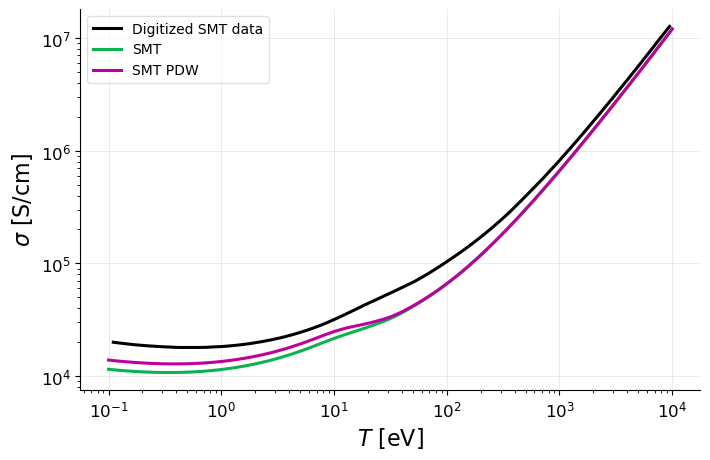

In [52]:
fig, ax = plt.subplots( facecolor='white')

# Plot digitized eSMT data
ax.plot(σ_data_e1b['T[eV]'], σ_data_e1b['σ[S/cm]'],'k-', label="Digitized SMT data")

# SMT
ax.plot(T_AU_list*AU_to_eV, σeSMT(T_eV_list), label='SMT')
ax.plot(T_AU_list*AU_to_eV, σeSMTPDW(T_eV_list), label='SMT PDW')

# ax.set_ylabel(r"$\eta $[g cm$^{-1}$ s$^{-1}$]")
ax.set_xlabel(r"$T$ [eV]")
ax.set_ylabel(r"$\sigma$ [S/cm]")
# Inset Text Box
bbox = dict(boxstyle='round', facecolor='white', alpha=0.5)
# inset_text = f"{Element_name}\n {sci_notation(ni_cc,3)} [cc$^{{-1}}$]" 
# ax.text(0.35, 0.95, inset_text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=smt)

# ax.errorbar([tccw_TeV],[tccw_η_cgs], yerr=[tccw_η_cgs_err], barsabove=True, capsize=5, marker='.', label='MD Simulation')

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

# Legend
ax.legend()



## Thermal Conductivity

#### SMT

In [10]:
κ_data_e3b = read_csv("Fig3b_eSMT_κ.txt", delim_whitespace=True, header=1)

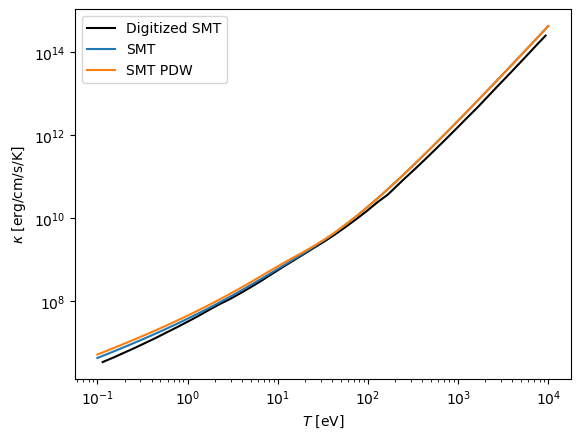

In [41]:
fig, ax = plt.subplots( facecolor='white')

# Plot digitized eSMT data
ax.plot(κ_data_e3b['T[eV]'], κ_data_e3b['κ[erg/cm/s/K]'],'k-', label="Digitized SMT")

#
ax.plot(T_AU_list*AU_to_eV, κeSMT(T_eV_list), label='SMT')
ax.plot(T_AU_list*AU_to_eV, κeSMTPDW(T_eV_list), label='SMT PDW')

ax.set_ylabel(r"$\kappa$ [erg/cm/s/K]")
ax.set_xlabel(r"$T$ [eV]")

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

# Legend
ax.legend()


In [12]:
25*smt.K_11_matrix[1:,1], - 20*smt.K_12_matrix[1:,1], 4*smt.K_13_matrix[1:,1]

(array([50.48193127]), array([-45.55703502]), array([19.30345724]))

#### TCCW2

In [13]:
N_ions = 1
Z, A = 6, 12
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])
T_array_AU = np.array([1*eV_to_AU, 1*eV_to_AU ])
ρi_gpercc  = 10
ni_array_cc = np.array([ρi_gpercc])/(mi_array_AU*AU_to_g)
ni_array_AU = ni_array_cc*invcc_to_AU
tccw2_κ_smt = SMT.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )

T_AU_list = np.geomspace(1e-2,2e3,num=50)*eV_to_AU
# T_AU_list = np.array(σ_data_e1b['T[eV]'])*eV_to_AU
σ_list_cgs = np.ones_like(T_AU_list)
κe_list_cgs = np.ones_like(T_AU_list)
D_list_cgs = np.ones_like(T_AU_list)
g_ee_list = np.ones_like(T_AU_list)
λi_list = np.ones_like(T_AU_list)
λe_list = np.ones_like(T_AU_list)
for i, T_AU in enumerate(T_AU_list): 
    tccw2_κ_smt.T_array = np.array([T_AU, T_AU])
    σ_list_cgs[i] = tccw2_κ_smt.σ * AU_to_Siemens/AU_to_cm
    κe_list_cgs[i] = tccw2_κ_smt.κee * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)  #erg/cm/s/K
    D_list_cgs[i] = tccw2_κ_smt.Dij[1,1] *AU_to_cm**2/AU_to_s
    g_ee_list[i] = tccw2_κ_smt.g_matrix[0,0]
    λi_list[i]   = tccw2_κ_smt.λi_array[0]
    λe_list[i]   = tccw2_κ_smt.λe

In [14]:
κe_data_tccw2_κ = read_csv("Fig7tm_TCCW2_κ.txt", delim_whitespace=True, header=1)
κe_data_tccw2_κ_AA = read_csv("Fig7tm_TCCW2_κ_AA.txt", delim_whitespace=True, header=1)

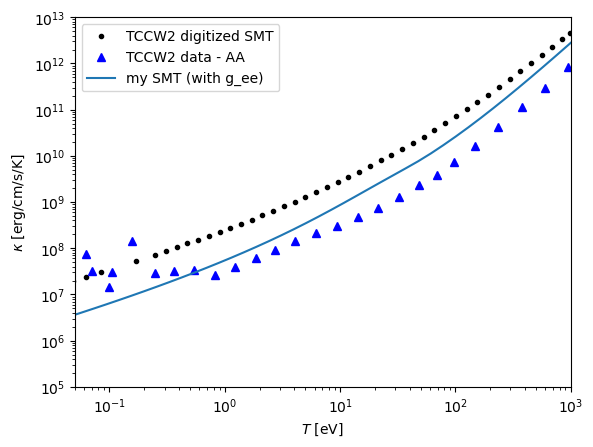

In [15]:
fig, ax = plt.subplots( facecolor='white')

# Plot digitized eSMT data
ax.plot(κe_data_tccw2_κ['T[eV]'], κe_data_tccw2_κ['κ[erg/cm/s/K]'],'k.', label="TCCW2 digitized SMT")
ax.plot(κe_data_tccw2_κ_AA['T[eV]'], κe_data_tccw2_κ_AA['κ[erg/cm/s/K]'],'b^', label="TCCW2 data - AA")

#
ax.plot(T_AU_list*AU_to_eV, κe_list_cgs, label='my SMT (with g_ee)')

ax.set_ylabel(r"$\kappa$ [erg/cm/s/K]")
ax.set_xlabel(r"$T$ [eV]")

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e5,1e13)
ax.set_xlim(0.5e-1,1e3)

# Legend
ax.legend()


In [16]:
np.array([T_AU_list*AU_to_eV, σ_list_cgs]).T

array([[1.00000000e-02, 7.61627509e+04],
       [1.28287483e-02, 7.12104374e+04],
       [1.64576784e-02, 6.66907488e+04],
       [2.11131414e-02, 6.25676397e+04],
       [2.70855178e-02, 5.88086068e+04],
       [3.47473291e-02, 5.53843874e+04],
       [4.45764741e-02, 5.22686918e+04],
       [5.71860368e-02, 4.94379692e+04],
       [7.33625274e-02, 4.68712042e+04],
       [9.41149402e-02, 4.45497427e+04],
       [1.20737688e-01, 4.24571467e+04],
       [1.54891342e-01, 4.05790777e+04],
       [1.98706204e-01, 3.89032087e+04],
       [2.54915189e-01, 3.74191667e+04],
       [3.27024280e-01, 3.61185070e+04],
       [4.19531219e-01, 3.49947223e+04],
       [5.38206043e-01, 3.40432907e+04],
       [6.90450988e-01, 3.32617670e+04],
       [8.85762197e-01, 3.26499241e+04],
       [1.13632203e+00, 3.22099486e+04],
       [1.45775894e+00, 3.19466970e+04],
       [1.87012225e+00, 3.18680095e+04],
       [2.39913278e+00, 3.19850660e+04],
       [3.07778706e+00, 3.23127313e+04],
       [3.948415

In [17]:
np.array([T_AU_list*AU_to_eV, κe_list_cgs]).T

array([[1.00000000e-02, 1.03476050e+06],
       [1.28287483e-02, 1.24901624e+06],
       [1.64576784e-02, 1.51063289e+06],
       [2.11131414e-02, 1.83090337e+06],
       [2.70855178e-02, 2.22405453e+06],
       [3.47473291e-02, 2.70808476e+06],
       [4.45764741e-02, 3.30586609e+06],
       [5.71860368e-02, 4.04660336e+06],
       [7.33625274e-02, 4.96777880e+06],
       [9.41149402e-02, 6.11776179e+06],
       [1.20737688e-01, 7.55933746e+06],
       [1.54891342e-01, 9.37451469e+06],
       [1.98706204e-01, 1.16711315e+07],
       [2.54915189e-01, 1.45920079e+07],
       [3.27024280e-01, 1.83277433e+07],
       [4.19531219e-01, 2.31347764e+07],
       [5.38206043e-01, 2.93611185e+07],
       [6.90450988e-01, 3.74833794e+07],
       [8.85762197e-01, 4.81605697e+07],
       [1.13632203e+00, 6.23130344e+07],
       [1.45775894e+00, 8.12393142e+07],
       [1.87012225e+00, 1.06790527e+08],
       [2.39913278e+00, 1.41632089e+08],
       [3.07778706e+00, 1.89637373e+08],
       [3.948415

In [18]:
25*smt.K_11_matrix[1:,1], - 20*smt.K_12_matrix[1:,1], 4*smt.K_13_matrix[1:,1]

(array([50.48193127]), array([-45.55703502]), array([19.30345724]))

## Diffusion

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


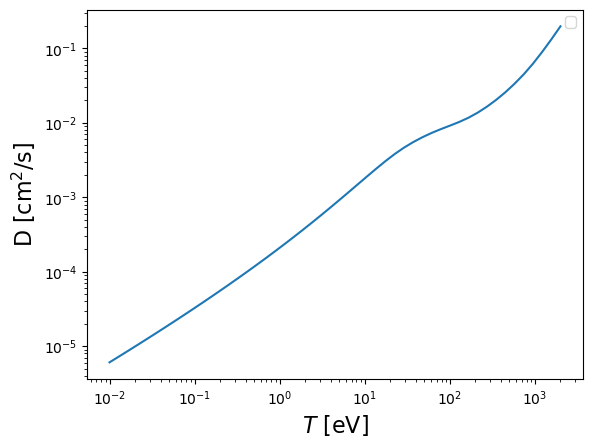

In [19]:
fig, ax = plt.subplots( facecolor='white')

ax.plot(T_AU_list*AU_to_eV, D_list_cgs, label='')

# ax.set_ylabel(r"$\eta $[g cm$^{-1}$ s$^{-1}$]")
ax.set_xlabel(r"$T$ [eV]")

# Inset Text Box
bbox = dict(boxstyle='round', facecolor='white', alpha=0.5)
# inset_text = f"{Element_name}\n {sci_notation(ni_cc,3)} [cc$^{{-1}}$]" 
# ax.text(0.35, 0.95, inset_text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=smt)

# ax.errorbar([tccw_TeV],[tccw_η_cgs], yerr=[tccw_η_cgs_err], barsabove=True, capsize=5, marker='.', label='MD Simulation')

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel(r"D [cm$^2$/s]", fontsize=16)
ax.set_xlabel(r"$T$ [eV]", fontsize=16)

# Legend
ax.legend()


## Temperature Relaxation
In reference [1], they actually use
$$\tau_{MD} = 2/(\tau_{ei}^{-1} + \tau_{ie}^{-1}) $$
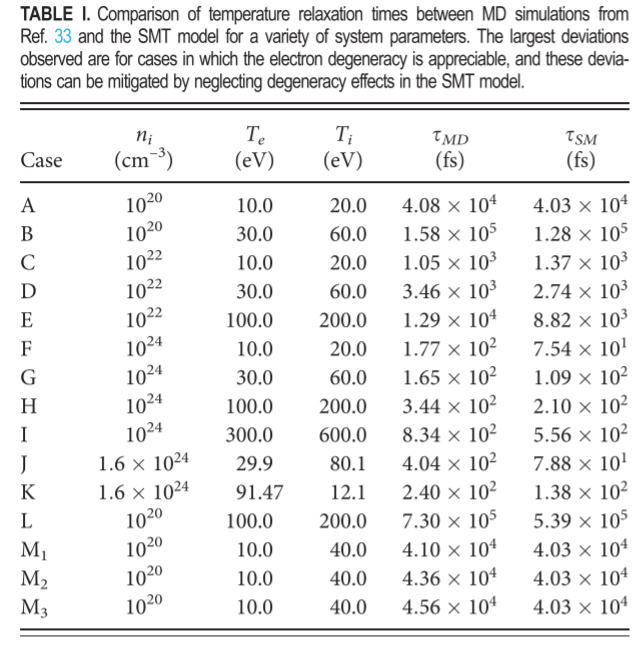


In [20]:
N_ions = 1
Z, A = 1, 1
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])


In [21]:
# Case A
T_array_AU = np.array([10*eV_to_AU, 20*eV_to_AU ])

# Densities
ni_array_cc = np.array([1e20])
ni_array_AU = ni_array_cc*invcc_to_AU

smt = SMT.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )
print("τ_SM = {0:.2e}".format(2/( smt.τij[0,1]**-1 + smt.τij[1,0]**-1)  *AU_to_s*1e15))

τ_SM = 4.55e+04


In [22]:
# Case B
T_array_AU = np.array([30*eV_to_AU, 60*eV_to_AU ])

# Densities
ni_array_cc = np.array([1e20])
ni_array_AU = ni_array_cc*invcc_to_AU

smt = SMT.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )
print("τ_SM = {0:.2e}".format(2/( smt.τij[0,1]**-1 + smt.τij[1,0]**-1)  *AU_to_s*1e15))

τ_SM = 1.35e+05


In [23]:
# 